

## Convolutional Neural Networks

---

In this notebook, we train an MLP to classify images from the MNIST database.

### 1. Load MNIST Database

In [93]:
from keras.datasets import mnist

# use Keras to import pre-shuffled MNIST database
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("The MNIST database has a training set of %d examples." % len(X_train))
print("The MNIST database has a test set of %d examples." % len(X_test))

The MNIST database has a training set of 60000 examples.
The MNIST database has a test set of 10000 examples.


### 2. Visualize the First Six Training Images

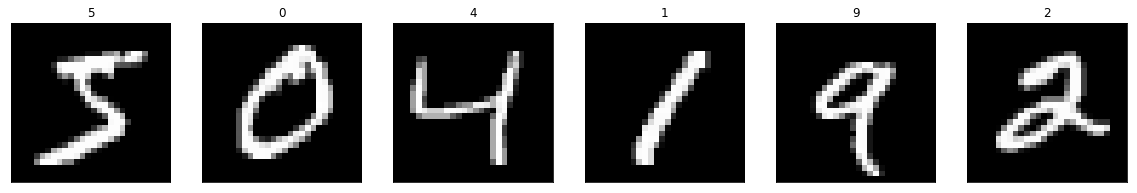

In [94]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import numpy as np

# plot first six training images
fig = plt.figure(figsize=(20,20))
for i in range(6):
    ax = fig.add_subplot(1, 6, i+1, xticks=[], yticks=[])
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(str(y_train[i]))

### 3. View an Image in More Detail

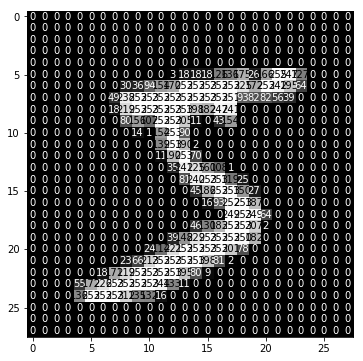

In [95]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

fig = plt.figure(figsize = (6,6)) 
ax = fig.add_subplot(111)
visualize_input(X_train[0], ax)

### 4. Rescale the Images by Dividing Every Pixel in Every Image by 255

In [5]:
# rescale [0,255] --> [0,1]
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255 

### 5. Encode Categorical Integer Labels Using a One-Hot Scheme

In [96]:
from keras.utils import np_utils

# print first ten (integer-valued) training labels
print('Integer-valued labels:')
print(y_train[:10])

# one-hot encode the labels
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

# print first ten (one-hot) training labels
print('One-hot labels:')
print(y_train[:10])

Integer-valued labels:
[5 0 4 1 9 2 1 3 1 4]
One-hot labels:
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


### 6. Define the Model Architecture

In [97]:
import matplotlib.pyplot as plt

def plot_train_loss(history):
    history_dict = history.history
    loss_vals = history_dict['loss']
    val_loss_vals = history_dict['val_loss']

    # epoch num on x-axis
    epochs = range(1, len(loss_vals)+1)

    plt.plot(epochs, loss_vals, 'bo', label='Training Loss')
    plt.plot(epochs, val_loss_vals, 'b', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
def plot_train_acc(history):
    history_dict = history.history
    acc_vals = history_dict['acc']
    val_acc_vals = history_dict['val_acc']

    # epoch num on x-axis
    epochs = range(1, len(acc_vals)+1)
    
    plt.plot(epochs, acc_vals, 'ro', label='Training Accuracy')
    plt.plot(epochs, val_acc_vals, 'r', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

In [98]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

# define the model
# model = Sequential()
# model.add(Flatten(input_shape=X_train.shape[1:]))
# model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(10, activation='softmax'))

model = Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
# summarize the model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_24 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_70 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_44 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_71 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_45 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_72 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


### 7. Compile the Model

In [99]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

### 8. Calculate the Classification Accuracy on the Test Set (Before Training)

# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

### 9. Train the Model
from keras.callbacks import ModelCheckpoint, EarlyStopping

# train the model
#checkpointer =  EarlyStopping(monitor='val_loss',verbose=1)
checkpointer = ModelCheckpoint(filepath='mnist.model.best.hdf5', verbose=1, save_best_only=True)

hist = model.fit(X_train, y_train, batch_size=128, epochs=15,
          validation_split=0.2, callbacks=[checkpointer], verbose=1, shuffle=True)

### 10. Load the Model with the Best Classification Accuracy on the Validation Set

# load the weights that yielded the best validation accuracy
# model.load_weights('mnist.model.best.hdf5')

### 11. Calculate the Classification Accuracy on the Test Set

# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('\n\n')
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 10.8100%
Train on 48000 samples, validate on 12000 samples
Epoch 1/15
48000/48000 [==============================] - 4s 90us/step - loss: 9.7982 - acc: 0.3908 - val_loss: 8.3856 - val_acc: 0.4793

Epoch 00001: val_loss improved from inf to 8.38562, saving model to mnist.model.best.hdf5
Epoch 2/15
48000/48000 [==============================] - 3s 72us/step - loss: 8.5014 - acc: 0.4719 - val_loss: 8.5425 - val_acc: 0.4698

Epoch 00002: val_loss did not improve from 8.38562
Epoch 3/15
48000/48000 [==============================] - 3s 70us/step - loss: 8.4777 - acc: 0.4737 - val_loss: 8.2380 - val_acc: 0.4887

Epoch 00003: val_loss improved from 8.38562 to 8.23798, saving model to mnist.model.best.hdf5
Epoch 4/15
48000/48000 [==============================] - 3s 68us/step - loss: 8.3303 - acc: 0.4829 - val_loss: 8.4292 - val_acc: 0.4768

Epoch 00004: val_loss did not improve from 8.23798
Epoch 5/15
48000/48000 [==============================] - 3s 72us/step - loss: 8.2695 - 

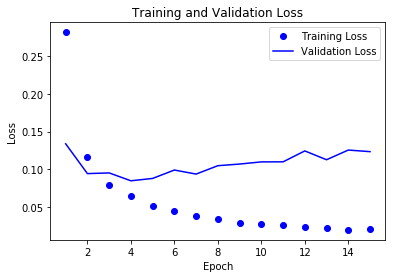

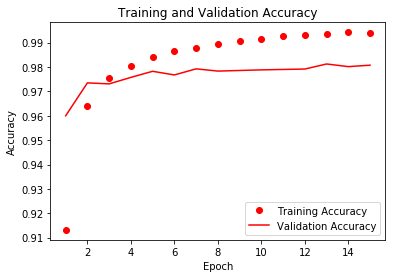

In [64]:
plot_train_loss(hist)
plot_train_acc(hist)

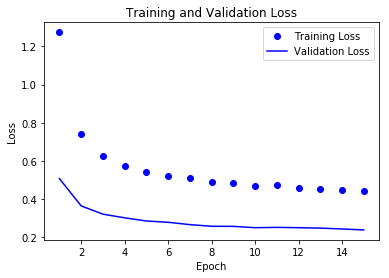

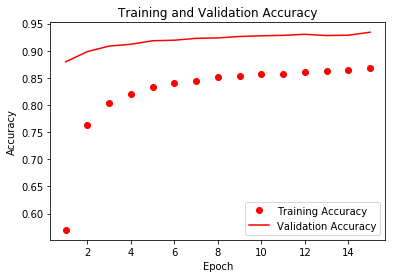

In [69]:
# decrease nodes
plot_train_loss(hist)
plot_train_acc(hist)

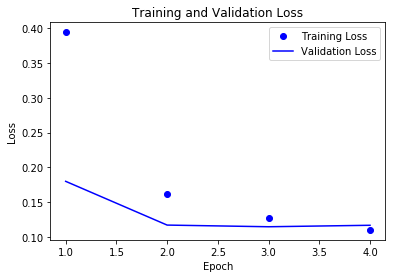

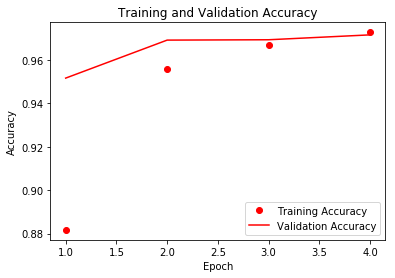

In [49]:
# increase layers
plot_train_loss(hist)
plot_train_acc(hist)

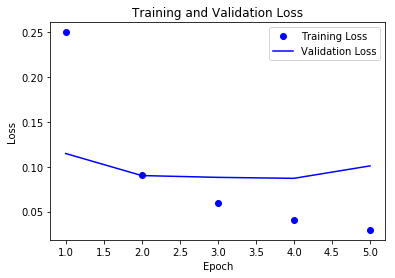

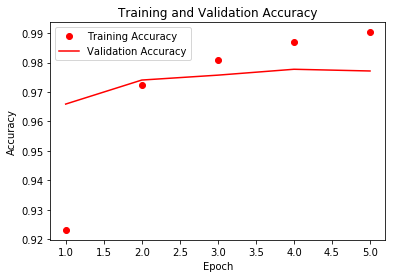

In [54]:
# remove dropout
plot_train_loss(hist)
plot_train_acc(hist)

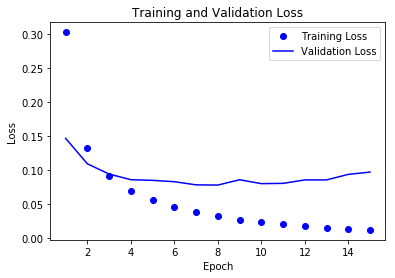

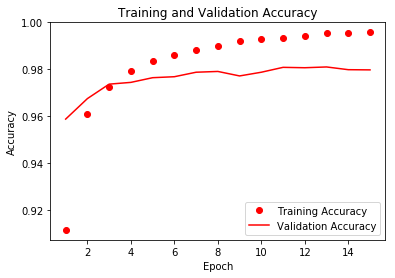

In [61]:
# decrease layers
plot_train_loss(hist)
plot_train_acc(hist)

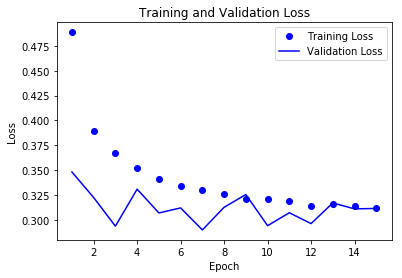

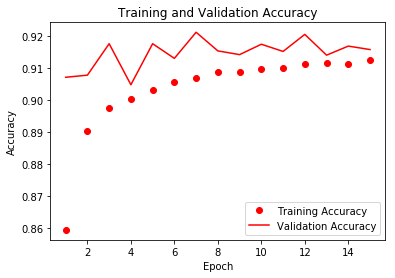

In [73]:
# remove relu
plot_train_loss(hist)
plot_train_acc(hist)

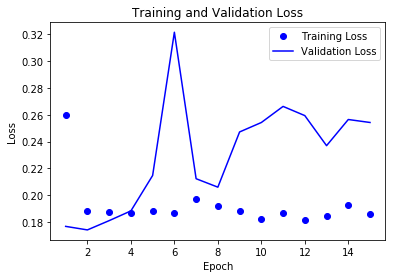

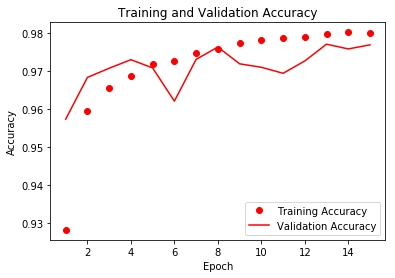

In [76]:
# decrease batch size
plot_train_loss(hist)
plot_train_acc(hist)

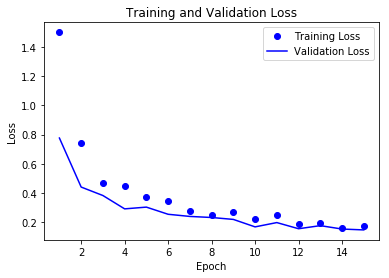

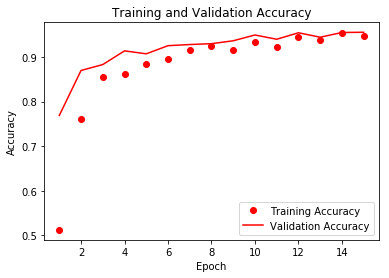

In [79]:
# increase batch size
# print test accuracy
print('\n\n')
print('Test accuracy: %.4f%%' % accuracy)
plot_train_loss(hist)
plot_train_acc(hist)




Test accuracy: 98.1800%


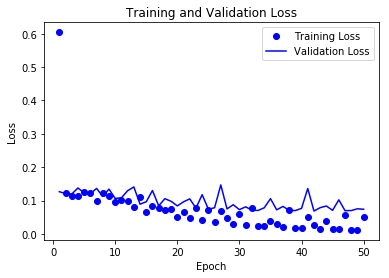

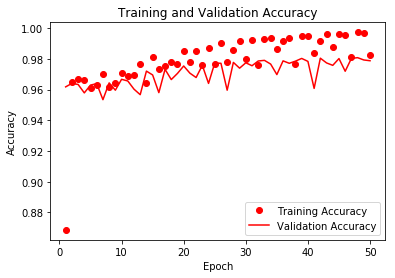

In [81]:
# increase batch size
# print test accuracy
print('\n\n')
print('Test accuracy: %.4f%%' % accuracy)
plot_train_loss(hist)
plot_train_acc(hist)




Test accuracy: 94.4500%


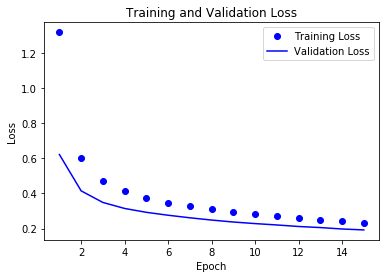

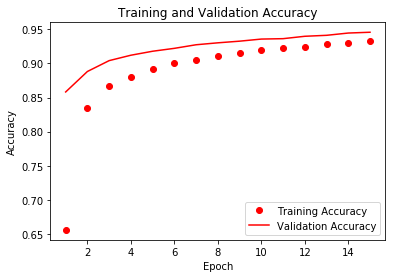

In [84]:
# 改成SGD
# print test accuracy
print('\n\n')
print('Test accuracy: %.4f%%' % accuracy)
plot_train_loss(hist)
plot_train_acc(hist)




Test accuracy: 97.0800%


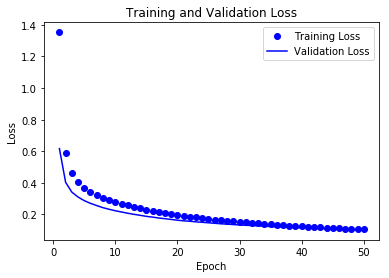

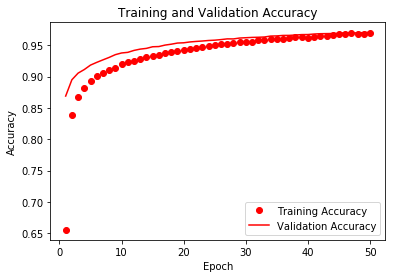

In [87]:
# 改成SGD
# print test accuracy
print('\n\n')
print('Test accuracy: %.4f%%' % accuracy)
plot_train_loss(hist)
plot_train_acc(hist)




Test accuracy: 98.3600%


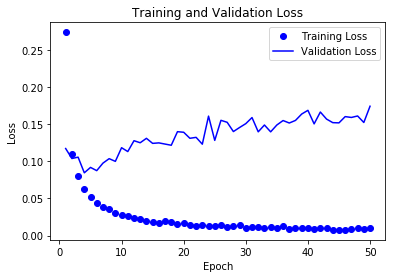

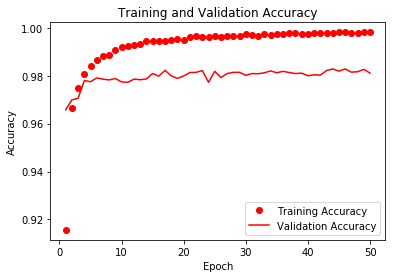

In [92]:
# 原始版
# print test accuracy
print('\n\n')
print('Test accuracy: %.4f%%' % accuracy)
plot_train_loss(hist)
plot_train_acc(hist)




Test accuracy: 49.1900%


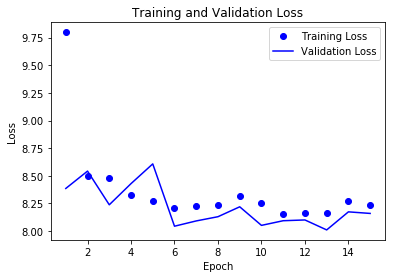

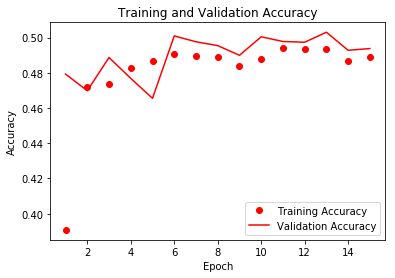

In [100]:
# 沒有除255
print('\n\n')
print('Test accuracy: %.4f%%' % accuracy)
plot_train_loss(hist)
plot_train_acc(hist)